<a href="https://colab.research.google.com/github/ani-91/CS-F407-project/blob/main/PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the terrain and obstacles
terrain_size = 20
obstacle_density = 0.1
terrain = np.zeros((terrain_size, terrain_size))

# Generate obstacles randomly
obstacles = np.random.rand(terrain_size, terrain_size) < obstacle_density
terrain[obstacles] = 1

# Plot the terrain with obstacles
plt.imshow(terrain, cmap='Reds', origin='upper', extent=[0, terrain_size, 0, terrain_size])
plt.title('Terrain with Obstacles')
plt.show()

# PSO-BAS algorithm for UAV route planning
class Particle:
    def __init__(self, dim):
        self.position = np.random.rand(dim, 2) * terrain_size
        self.velocity = np.random.rand(dim, 2)
        self.best_position = np.copy(self.position)
        self.fitness = float('inf')

def objective_function(position, terrain):
    # Simple objective function based on terrain traversal
    rounded_positions = np.round(position).astype(int)
    valid_indices = (rounded_positions[:, 0] >= 0) & (rounded_positions[:, 0] < terrain.shape[0]) & \
                    (rounded_positions[:, 1] >= 0) & (rounded_positions[:, 1] < terrain.shape[1])
    return sum([terrain[idx[0], idx[1]] for idx in rounded_positions[valid_indices]])

def update_velocity(particle, global_best_position, w, c1, c2):
    inertia = w * particle.velocity
    cognitive = c1 * np.random.rand(*particle.position.shape) * (particle.best_position - particle.position)
    social = c2 * np.random.rand(*particle.position.shape) * (global_best_position - particle.position)
    return inertia + cognitive + social

def obstacle_penalty(position, terrain):
    # Calculate penalty based on obstacles
    rounded_positions = np.round(position).astype(int)
    valid_indices = (rounded_positions[:, 0] >= 0) & (rounded_positions[:, 0] < terrain.shape[0]) & \
                    (rounded_positions[:, 1] >= 0) & (rounded_positions[:, 1] < terrain.shape[1])
    penalty = np.sum(terrain[rounded_positions[valid_indices][:, 0], rounded_positions[valid_indices][:, 1]])
    return penalty

def pso_bas_algorithm(dim, num_particles, num_iterations, w, c1, c2, terrain, **kwargs):
    particles = [Particle(dim) for _ in range(num_particles)]
    global_best_position = None
    global_best_fitness = float('inf')

    for _ in range(num_iterations):
        for particle in particles:
            # Evaluate fitness considering obstacle avoidance
            particle.fitness = objective_function(particle.position, terrain) + obstacle_penalty(particle.position, terrain)

            if particle.fitness < objective_function(particle.best_position, terrain):
                particle.best_position = np.copy(particle.position)

            if particle.fitness < global_best_fitness:
                global_best_position = np.copy(particle.position)
                global_best_fitness = particle.fitness

        for particle in particles:
            particle.velocity = update_velocity(particle, global_best_position, w, c1, c2)
            particle.position += particle.velocity

    return global_best_position, global_best_fitness

# Example usage
dim = 10  # Number of waypoints
num_particles = 20
num_iterations = 1000
w = 0.5  # Inertia weight
c1 = 1.5  # Cognitive coefficient
c2 = 1.5  # Social coefficient

best_position, best_fitness = pso_bas_algorithm(dim, num_particles, num_iterations, w, c1, c2, terrain)

# Plot the UAV route on the terrain
plt.imshow(terrain, cmap='Reds', origin='upper', extent=[0, terrain_size, 0, terrain_size])
plt.plot(best_position[:, 1], best_position[:, 0], marker='o', color='pink', markersize=8)
plt.title('UAV Route Planning with PSO-BAS')
plt.show()

def compare_parameter_sets(parameter_sets, terrain):
    plt.figure(figsize=(12, 8))

    for params in parameter_sets:
        label = params.pop('label', None)
        best_position, _ = pso_bas_algorithm(dim, num_particles, num_iterations, terrain=terrain, **params)
        plt.plot(best_position[:, 1], best_position[:, 0], marker='o', markersize=8, label=label)

    plt.imshow(terrain, cmap='Reds', origin='upper', extent=[0, terrain_size, 0, terrain_size], alpha=0.3)
    plt.title('UAV Route Planning with PSO-BAS - Different Parameter Sets')
    plt.legend()
    plt.show()

# Define different parameter sets to compare
parameter_sets = [
    {'w': 0.5, 'c1': 1.5, 'c2': 1.5, 'label': 'Default'},
    {'w': 0.9, 'c1': 1.5, 'c2': 1.5, 'label': 'High Inertia'},
    {'w': 0.1, 'c1': 1.5, 'c2': 1.5, 'label': 'Low Inertia'},
    {'w': 0.5, 'c1': 0.5, 'c2': 1.5, 'label': 'Low Cognitive'},
    {'w': 0.5, 'c1': 1.5, 'c2': 0.5, 'label': 'Low Social'},
]

# Call the function to compare and plot results
compare_parameter_sets(parameter_sets, terrain)


# **This Code seeks to implement the PSO - Particle Swarm Optimisation Algorithm in the domain of Air Traffic Management, namely the route planning and avoidance of obstacles by Aerial Vehicles enroute.**









 1. Importing of necessary libraries :

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

2. Defining the Terrain to be Navigated by the Aerial Vehicle; this code was developed, keeping in mind the Research Paper by ZHANG Honghong, GAN Xusheng, LI Shuangfeng & CHEN Zhiyuan; Journal of Systems Engineering and Electronics Vol. 33, No. 5, October 2022; https://ieeexplore.ieee.org/document/9940203 on the safe flying paths of UAVs :

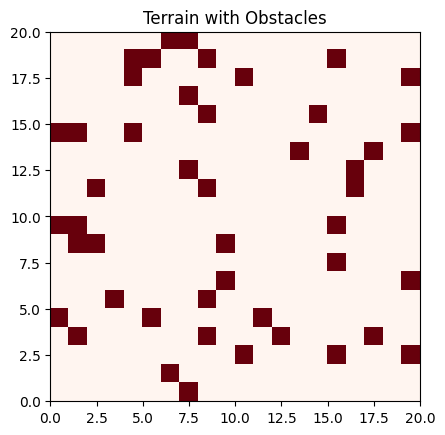

In [ ]:
# Define the terrain and obstacles
terrain_size = 20
obstacle_density = 0.1
terrain = np.zeros((terrain_size, terrain_size))

# Generate obstacles randomly
obstacles = np.random.rand(terrain_size, terrain_size) < obstacle_density
terrain[obstacles] = 1

# Plot the terrain with obstacles
plt.imshow(terrain, cmap='Reds', origin='upper', extent=[0, terrain_size, 0, terrain_size])
plt.title('Terrain with Obstacles')
plt.show()

3. Defining the class Particle(UAV), Objective Function(to be maximised acc to terrain and postion), Update Velocity Function (w, c1, c2) & a Obstacle Penalty Function (to be minimised) :

In [ ]:
# PSO-BAS algorithm for UAV route planning
class Particle:
    def __init__(self, dim):
        self.position = np.random.rand(dim, 2) * terrain_size
        self.velocity = np.random.rand(dim, 2)
        self.best_position = np.copy(self.position)
        self.fitness = float('inf')

def objective_function(position, terrain):
    # Simple objective function based on terrain traversal
    rounded_positions = np.round(position).astype(int)
    valid_indices = (rounded_positions[:, 0] >= 0) & (rounded_positions[:, 0] < terrain.shape[0]) & \
                    (rounded_positions[:, 1] >= 0) & (rounded_positions[:, 1] < terrain.shape[1])
    return sum([terrain[idx[0], idx[1]] for idx in rounded_positions[valid_indices]])

def update_velocity(particle, global_best_position, w, c1, c2):
    inertia = w * particle.velocity
    cognitive = c1 * np.random.rand(*particle.position.shape) * (particle.best_position - particle.position)
    social = c2 * np.random.rand(*particle.position.shape) * (global_best_position - particle.position)
    return inertia + cognitive + social

def obstacle_penalty(position, terrain):
    # Calculate penalty based on obstacles
    rounded_positions = np.round(position).astype(int)
    valid_indices = (rounded_positions[:, 0] >= 0) & (rounded_positions[:, 0] < terrain.shape[0]) & \
                    (rounded_positions[:, 1] >= 0) & (rounded_positions[:, 1] < terrain.shape[1])
    penalty = np.sum(terrain[rounded_positions[valid_indices][:, 0], rounded_positions[valid_indices][:, 1]])
    return penalty

4. The Basic working of the PSO ALgorithm, in an attempt to reach the global best postion for that particle :

In [ ]:
def pso_bas_algorithm(dim, num_particles, num_iterations, w, c1, c2, terrain, **kwargs):
    particles = [Particle(dim) for _ in range(num_particles)]
    global_best_position = None
    global_best_fitness = float('inf')

    for _ in range(num_iterations):
        for particle in particles:
            # Evaluate fitness considering obstacle avoidance
            particle.fitness = objective_function(particle.position, terrain) + obstacle_penalty(particle.position, terrain)

            if particle.fitness < objective_function(particle.best_position, terrain):
                particle.best_position = np.copy(particle.position)

            if particle.fitness < global_best_fitness:
                global_best_position = np.copy(particle.position)
                global_best_fitness = particle.fitness

        for particle in particles:
            particle.velocity = update_velocity(particle, global_best_position, w, c1, c2)
            particle.position += particle.velocity

    return global_best_position, global_best_fitness

5. Example of the Working of the code :

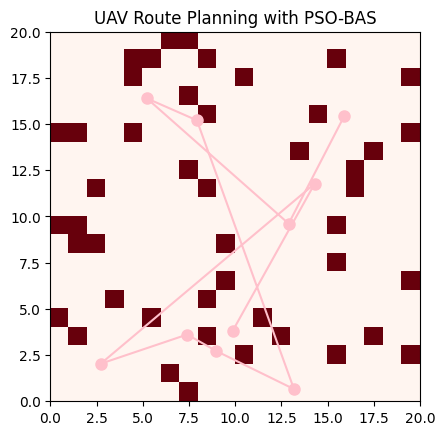

In [ ]:
# Example usage
dim = 10  # Number of waypoints
num_particles = 20 # No of UAVs in the swarm navigating the terrain
num_iterations = 10000

w = 0.5  # Inertia weight
c1 = 1.5  # Cognitive coefficient
c2 = 1.5  # Social coefficient

best_position, best_fitness = pso_bas_algorithm(dim, num_particles, num_iterations, w, c1, c2, terrain)

# Plot the UAV route on the terrain
plt.imshow(terrain, cmap='Reds', origin='upper', extent=[0, terrain_size, 0, terrain_size])
plt.plot(best_position[:, 1], best_position[:, 0], marker='o', color='pink', markersize=8)
plt.title('UAV Route Planning with PSO-BAS')
plt.show()

6. Comparison of results the PSO code gives, considering the variation in the controlling parameters in the movement (w, c1, c2):

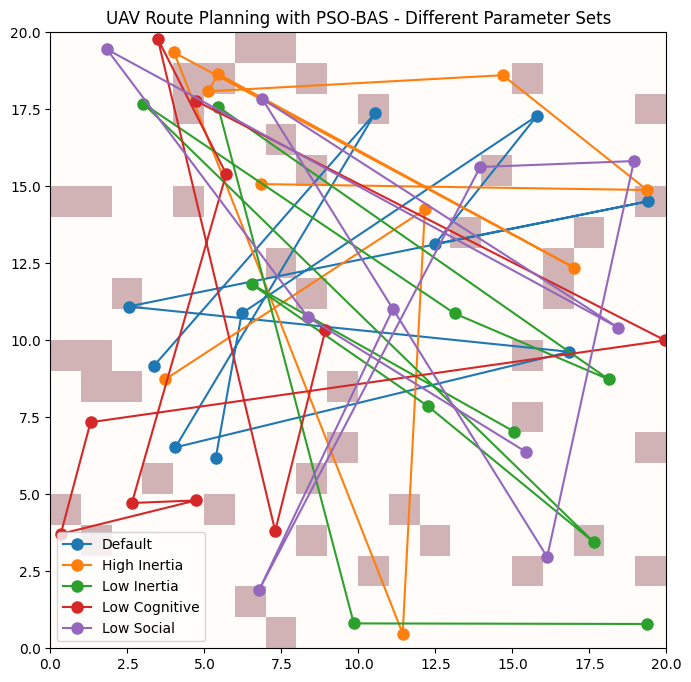

In [ ]:
def compare_parameter_sets(parameter_sets, terrain):
    plt.figure(figsize=(12, 8))

    for params in parameter_sets:
        label = params.pop('label', None)
        best_position, _ = pso_bas_algorithm(dim, num_particles, num_iterations, terrain=terrain, **params)
        plt.plot(best_position[:, 1], best_position[:, 0], marker='o', markersize=8, label=label)

    plt.imshow(terrain, cmap='Reds', origin='upper', extent=[0, terrain_size, 0, terrain_size], alpha=0.3)
    plt.title('UAV Route Planning with PSO-BAS - Different Parameter Sets')
    plt.legend()
    plt.show()

# Define different parameter sets to compare
parameter_sets = [
    {'w': 0.5, 'c1': 1.5, 'c2': 1.5, 'label': 'Default'},
    {'w': 0.9, 'c1': 1.5, 'c2': 1.5, 'label': 'High Inertia'},
    {'w': 0.1, 'c1': 1.5, 'c2': 1.5, 'label': 'Low Inertia'},
    {'w': 0.5, 'c1': 0.5, 'c2': 1.5, 'label': 'Low Cognitive'},
    {'w': 0.5, 'c1': 1.5, 'c2': 0.5, 'label': 'Low Social'},
]

# Call the function to compare and plot results
compare_parameter_sets(parameter_sets, terrain)